In [1]:
# 1) design model (input, output size, forward pass)
# 2) construct loss and optimizer
# 3) Training Loop
##   - forward pass: computer prediction
##   - backward Pass: gradients
##   - update weights
##   - Set Grad to Zero

In [35]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [36]:
X_train, y_train = datasets.make_regression(n_samples=100, n_features=1, noise=20)
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
print(X_train.shape)
print(y_train.shape)
y_train = y_train.view(y_train.shape[0],1)
print(y_train.shape)

torch.Size([100, 1])
torch.Size([100])
torch.Size([100, 1])


In [37]:
in_features = X_train.shape[1]
out_features = y_train.shape[1]
model = nn.Linear(in_features, out_features)

In [38]:
criterian = nn.MSELoss()

In [39]:
learning_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [40]:
epochs = 100

In [41]:
for epoch in range(epochs):
    # Forward pass
    y_predict = model(X_train)
    
    # Computer loss
    loss = criterian(y_predict, y_train)
    
    # back Propagation
    loss.backward()
    
    # optimizer step (to Update weights)
    optimiser.step()
    
    # gradients to zero
    optimiser.zero_grad()
    
    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 7187.5957
epoch: 20, loss = 4147.9458
epoch: 30, loss = 2473.2905
epoch: 40, loss = 1549.3588
epoch: 50, loss = 1038.7379
epoch: 60, loss = 755.9531
epoch: 70, loss = 598.9533
epoch: 80, loss = 511.5267
epoch: 90, loss = 462.6684
epoch: 100, loss = 435.2486


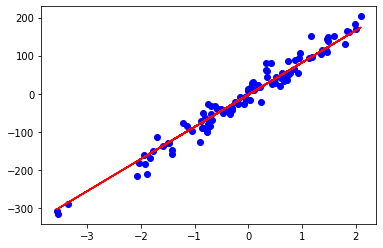

In [42]:
y_predicted = model(X_train).detach().numpy()
plt.plot(X_train, y_train, 'bo')
plt.plot(X_train, y_predicted, 'r')
plt.show()